<a href="https://colab.research.google.com/github/RifatMuhtasim/Machine_Learning/blob/main/K_Means_Clustering/Iris_dataset_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

In [43]:
# Load Iris Dataset

from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [44]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

df.drop(['sepal length (cm)', 'sepal width (cm)'], axis="columns", inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


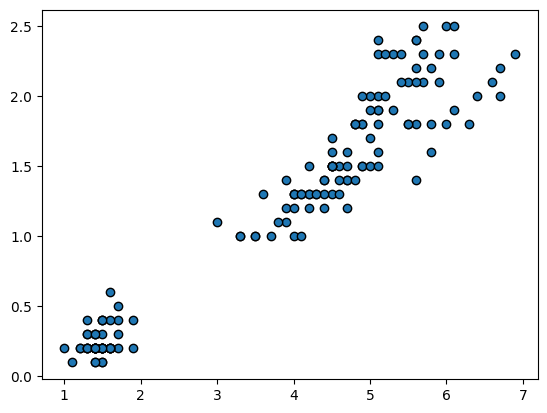

In [45]:
# Scatter Plot

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], edgecolor="black")
plt.show()

# Find the K-N value

In [46]:
k_rng = range(1, 11)
sse = []

for k in k_rng:
  km = KMeans(n_clusters=k, n_init = 10)
  km.fit(df[['petal length (cm)', 'petal width (cm)']])
  sse.append(km.inertia_)

sse

[550.8953333333334,
 86.39021984551397,
 31.37135897435897,
 19.48300089968511,
 13.983213141025638,
 11.025145110250373,
 9.28134334963282,
 7.621496965452849,
 6.580250956772696,
 5.800099468814636]

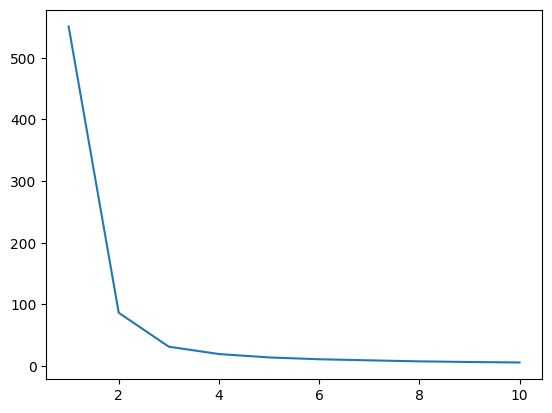

In [47]:
# SSE Plot

plt.plot(k_rng, sse)
plt.show()

**Comment:** Elbow point is 3.

In [48]:
# KMeans Clustering

km = KMeans(n_clusters=3, n_init=10)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])

In [49]:
df['cluster'] = y_predicted
print(df['cluster'].unique())
df.head()

[0 2 1]


,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


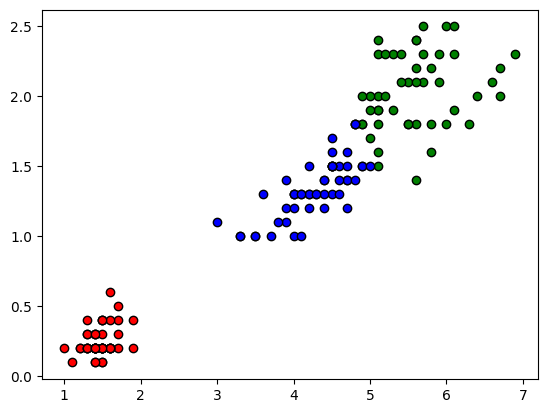

In [50]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], edgecolor="black", color="red")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], edgecolor="black", color="green")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], edgecolor="black", color="blue")

plt.show()